<a href="https://colab.research.google.com/github/dopedud/COMP3217-CW2/blob/main/source_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP3217 COURSEWORK 2

# Import Modules

In [89]:
import numpy as np
import pandas as pd

## Read Files

In [90]:
binary_dataset_training = pd.read_csv('TrainingDataBinary.csv')
binary_X_testing = pd.read_csv('TestingDataBinary.csv')

multi_dataset_training = pd.read_csv('TrainingDataMulti.csv')
multi_X_testing = pd.read_csv('TestingDataMulti.csv')

binary_dataset_training.info()
multi_dataset_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Columns: 129 entries, R1-PA1:VH    to marker
dtypes: float64(129)
memory usage: 5.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Columns: 129 entries, R1-PA1:VH    to marker
dtypes: float64(129)
memory usage: 5.9 MB


In [91]:
binary_dataset_training['marker'].describe()

count    6000.000000
mean        0.500000
std         0.500042
min         0.000000
25%         0.000000
50%         0.500000
75%         1.000000
max         1.000000
Name: marker, dtype: float64

In [92]:
multi_dataset_training['marker'].describe()

count    6000.000000
mean        1.000000
std         0.816565
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: marker, dtype: float64

## Seperate Features and Labels

In [93]:
binary_X_training = binary_dataset_training.iloc[:, :-1]
binary_Y_training = binary_dataset_training.iloc[:, -1]

multi_X_training = multi_dataset_training.iloc[:, :-1]
multi_Y_training = multi_dataset_training.iloc[:, -1]

## ML Training

In [94]:
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC

clf_binary = DummyClassifier(strategy = 'uniform')
clf_multi = DummyClassifier(strategy = 'uniform')

clf_binary.fit(binary_X_training, binary_Y_training)
binary_Y_testing = clf_binary.predict(binary_X_testing)

clf_multi.fit(multi_X_training, multi_Y_training)
multi_Y_testing = clf_multi.predict(multi_X_testing)

binary_X_testing.join(pd.DataFrame(binary_Y_testing, columns = ['marker'])).to_csv('TestingResultsBinary.csv', index = False)
multi_X_testing.join(pd.DataFrame(multi_Y_testing, columns = ['marker'])).to_csv('TestingResultsMulti.csv', index = False)

## Training Evaluation

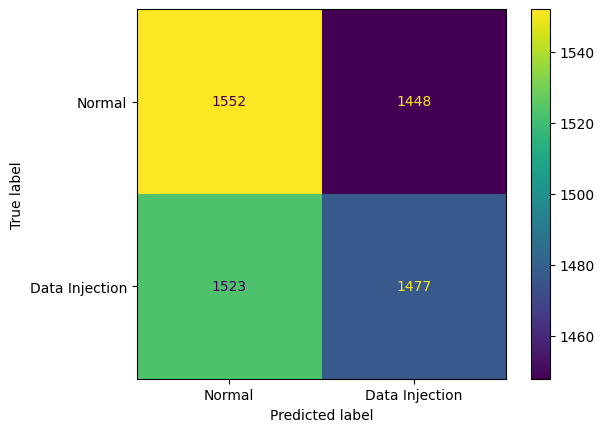


Accuracy score: 0.505
got until here
F1-score: 0.499

Precision score: 0.505
Recall score: 0.492

                precision    recall  f1-score   support

        Normal       0.50      0.52      0.51      3000
Data Injection       0.50      0.49      0.50      3000

      accuracy                           0.50      6000
     macro avg       0.50      0.50      0.50      6000
  weighted avg       0.50      0.50      0.50      6000




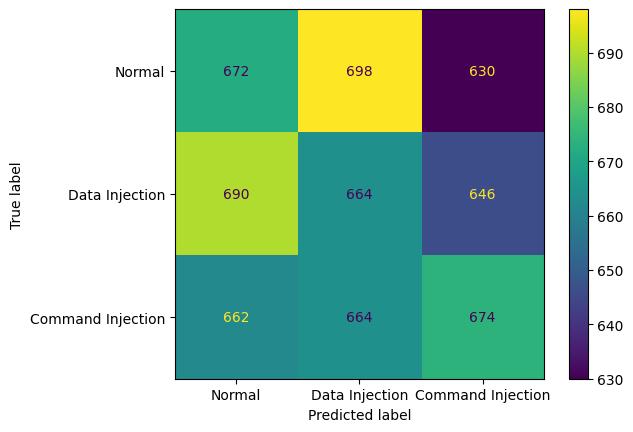


Accuracy score: 0.335
F1-score: 0.335

Precision score: 0.335
Recall score: 0.335

                   precision    recall  f1-score   support

           Normal       0.33      0.34      0.33      2000
   Data Injection       0.33      0.33      0.33      2000
Command Injection       0.35      0.34      0.34      2000

         accuracy                           0.34      6000
        macro avg       0.34      0.34      0.34      6000
     weighted avg       0.34      0.34      0.34      6000




In [95]:
import matplotlib.pyplot as plt

from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
)

def print_metrics(Y_test, predicted, labels):
    ConfusionMatrixDisplay(confusion_matrix(Y_test, predicted), display_labels = labels).plot()
    
    plt.show()
    
    print()

    print("Accuracy score: %.3f" % accuracy_score(Y_test, predicted))

    if (len(labels) > 2):
        print("F1-score: %.3f" % f1_score(Y_test, predicted, average = 'weighted'))

        print()

        print("Precision score: %.3f" % precision_score(Y_test, predicted, average = 'weighted'))
        print("Recall score: %.3f" % recall_score(Y_test, predicted, average = 'weighted'))

    else:
        print("got until here")
        print("F1-score: %.3f" % f1_score(Y_test, predicted))

        print()

        print("Precision score: %.3f" % precision_score(Y_test, predicted))
        print("Recall score: %.3f" % recall_score(Y_test, predicted))

    print()

    print(classification_report(Y_test, predicted, target_names = labels))

    print()

print_metrics(binary_Y_training, clf_binary.predict(binary_X_training), ['Normal', 'Data Injection'])
print_metrics(multi_Y_training, clf_multi.predict(multi_X_training), ['Normal', 'Data Injection', 'Command Injection'])